In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Get y

Run all of these cells to get the average y over any time interval. Arguments in `get_average_response` determine the time and coordinates over which to average.

See https://tc02d-dev.c3dti.ai/jupyter/notebooks/research_teams/gordon/accessing-data/Fetch3HourlyAODData.ipynb.

In [10]:
def get_response(gstp):
    # filter
    s3haodFilter = c3.Filter().eq("geoSurfaceTimePoint", gstp)
    
    # collect objects
    data = c3.Simulation3HourlyAODOutput.fetch({"filter": s3haodFilter})

    # cast it into pandas
    data = data.objs.toJson()
    return np.array(pd.DataFrame(data).loc[:, 'dust':'insolubleAitkenMode'].sum(axis=1))

In [11]:
def get_average_response(
    time1="2017-07-01T00:00:00",
    time2="2017-07-31T23:59:59",
    lat1 = 0.0,
    lat2 = 1.0,
    lon1 = 0.0,
    lon2 = 1.0
):
    gstpFilter = c3.Filter() \
        .ge("latitude", lat1) \
        .and_().le("latitude", lat2) \
        .and_().ge("longitude", lon1) \
        .and_().le("longitude", lon2) \
        .and_().ge("time", time1) \
        .and_().le("time", time2)
    gstps = c3.GeoSurfaceTimePoint.fetch({"filter": gstpFilter})
    
    each_response = [get_response(gstp) for gstp in gstps.objs]
    response_full = [len(resp)==221 for resp in each_response]
    
    my_dict = dict(zip(
        [gstps.objs[k].id for k in range(len(gstps.objs)) if response_full[k]],
        [each_response[k] for k in range(len(gstps.objs)) if response_full[k]]
    ))
    
    return pd.DataFrame(my_dict).mean(axis=1)

In [12]:
y_train = get_average_response(
    time1="2017-07-01T00:00:00",
    time2="2017-07-01T23:59:59",
    lat1 = -21.0,
    lat2 = -19.0,
    lon1 = -21.0,
    lon2 = -19.0
)

In [13]:
y_train

0      0.080389
1      0.081297
2      0.203766
3      0.088313
4      0.071086
         ...   
216    0.099501
217    0.053312
218    0.096659
219    0.045459
220    0.154825
Length: 221, dtype: float64

# Get x

Run these cells to get the full parameter table.

See https://tc02d-dev.c3dti.ai/jupyter/notebooks/research_teams/gordon/accessing-data/ensemble-members.ipynb.

In [14]:
# Obtain a comma-separated table of simulation ensemble members' parameter combinations
csv_table_metric = c3.SimulationModelParameters.fetch().objs.toJson()

# Save this table instead as a pandas dataframe (221 ensemble members x 64 parameters)
dfparams = pd.DataFrame(csv_table_metric)

In [15]:
# myFeaturesNames = dfparams.columns[5:]

myFeaturesNames = [
    "bparam",
    "acure_autoconv_exp_nd",
    "a_ent_1_rp",
    "acure_dry_dep_acc",
    "acure_dry_dep_ait",
    "acure_dry_dep_so2",
    "acure_bvoc_soa",
    "acure_dms",
    "acure_bl_nuc",
    "acure_ait_width",
    "acure_cloud_ph",
    "dbsdtbs_turb_0",
    "acure_bc_ri",
    "acure_sea_spray",
    "acure_carb_bb_diam",
    "acure_anth_so2_r",
    "acure_prim_so4_diam"
]

In [16]:
X_train = dfparams.loc[:, myFeaturesNames]

In [17]:
X_train

,bparam,acure_autoconv_exp_nd,a_ent_1_rp,acure_dry_dep_acc,acure_dry_dep_ait,acure_dry_dep_so2,acure_bvoc_soa,acure_dms,acure_bl_nuc,acure_ait_width,acure_cloud_ph,dbsdtbs_turb_0,acure_bc_ri,acure_sea_spray,acure_carb_bb_diam,acure_anth_so2_r,acure_prim_so4_diam
0,0.500000,0.605000,0.460000,0.500000,0.500000,0.500000,0.466533,0.502277,0.500000,0.650000,0.396000,0.150000,0.700000,0.500000,0.095238,0.557493,1.000000
1,0.500000,0.500000,0.500000,0.470000,0.530000,0.530000,0.500000,0.470000,0.470000,0.500000,0.500000,0.500000,0.500000,0.530000,0.500000,0.500000,0.500000
2,0.927093,0.755788,0.508725,0.618559,0.031372,0.942199,0.763283,0.415900,0.969888,0.083081,0.478474,0.774187,0.244755,0.989837,0.690581,0.232632,0.516864
3,0.950732,0.018570,0.936031,0.407896,0.666108,0.935930,0.009958,0.781631,0.132847,0.445265,0.390414,0.106893,0.190369,0.607072,0.283143,0.406850,0.792391
4,0.129769,0.651008,0.089525,0.746683,0.298250,0.307776,0.361367,0.918069,0.058261,0.630422,0.132292,0.613814,0.989161,0.545087,0.807161,0.965923,0.490741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,0.515917,0.900471,0.400788,0.853673,0.155006,0.947892,0.950993,0.335650,0.591530,0.996801,0.170201,0.035621,0.633787,0.745082,0.640570,0.584060,0.119761
217,0.786932,0.433408,0.116056,0.511722,0.204227,0.193137,0.097677,0.052142,0.774235,0.165151,0.881014,0.930975,0.949388,0.340840,0.736286,0.731972,0.807389
218,0.204519,0.741739,0.686731,0.833222,0.382876,0.093416,0.655217,0.854879,0.227072,0.231834,0.185796,0.144573,0.060917,0.500152,0.615861,0.970222,0.243118
219,0.303059,0.766313,0.826032,0.910051,0.680169,0.717122,0.973379,0.201878,0.047377,0.633909,0.721278,0.259877,0.568099,0.062070,0.785446,0.138241,0.827818


In [28]:
param_ranges = dict(zip(
    X_train.columns,
    [
        [-0.15, -0.13],
        [-3.0, -1.0],
        [0.0, 0.5],
        [0.1, 10.0],
        [0.5, 2.0],
        [0.2, 5.0],
        [0.32, 3.68],
        [0.33, 3.0],
        [0.1, 10.0],        
        [1.2, 1.8],
        [1.0*10**(-7), 2.51*10**(-5)],
        [0.0, 0.001],
        [0.2, 0.8],
        [0.25, 4.00],        
        [90.0, 300.0],
        [0.6, 1.5],
        [3.0, 100.0]
    ]
))

param_ranges

{'bparam': [-0.15, -0.13],
 'acure_autoconv_exp_nd': [-3.0, -1.0],
 'a_ent_1_rp': [0.0, 0.5],
 'acure_dry_dep_acc': [0.1, 10.0],
 'acure_dry_dep_ait': [0.5, 2.0],
 'acure_dry_dep_so2': [0.2, 5.0],
 'acure_bvoc_soa': [0.32, 3.68],
 'acure_dms': [0.33, 3.0],
 'acure_bl_nuc': [0.1, 10.0],
 'acure_ait_width': [1.2, 1.8],
 'acure_cloud_ph': [1e-07, 2.51e-05],
 'dbsdtbs_turb_0': [0.0, 0.001],
 'acure_bc_ri': [0.2, 0.8],
 'acure_sea_spray': [0.25, 4.0],
 'acure_carb_bb_diam': [90.0, 300.0],
 'acure_anth_so2_r': [0.6, 1.5],
 'acure_prim_so4_diam': [3.0, 100.0]}

In [30]:
param_df = pd.DataFrame()

def change_range(col, col_name):
    min_, max_ = param_ranges[col_name]
    return col*(max_ - min_) + min_

for col_name in X_train.columns:
    param_df[col_name] = change_range(X_train[col_name], col_name)

param_df

,bparam,acure_autoconv_exp_nd,a_ent_1_rp,acure_dry_dep_acc,acure_dry_dep_ait,acure_dry_dep_so2,acure_bvoc_soa,acure_dms,acure_bl_nuc,acure_ait_width,acure_cloud_ph,dbsdtbs_turb_0,acure_bc_ri,acure_sea_spray,acure_carb_bb_diam,acure_anth_so2_r,acure_prim_so4_diam
0,-0.140000,-1.790000,0.230000,5.050000,1.250000,2.600000,1.887549,1.671079,5.050000,1.590000,0.000010,0.000150,0.620000,2.125000,110.000000,1.101744,100.000000
1,-0.140000,-2.000000,0.250000,4.753000,1.295000,2.744000,2.000000,1.584900,4.753000,1.500000,0.000013,0.000500,0.500000,2.237500,195.000000,1.050000,51.500000
2,-0.131458,-1.488423,0.254363,6.223732,0.547059,4.722556,2.884630,1.440452,9.701887,1.249849,0.000012,0.000774,0.346853,3.961888,235.022028,0.809369,53.135851
3,-0.130985,-2.962859,0.468016,4.138175,1.499162,4.692464,0.353458,2.416954,1.415185,1.467159,0.000010,0.000107,0.314221,2.526519,149.459972,0.966165,79.861974
4,-0.147405,-1.697984,0.044762,7.492157,0.947375,1.677323,1.534192,2.781243,0.676787,1.578253,0.000003,0.000614,0.793496,2.294076,259.503909,1.469331,50.601877
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,-0.139682,-1.199057,0.200394,8.551365,0.732509,4.749883,3.515335,1.226185,5.956150,1.798080,0.000004,0.000036,0.580272,3.044058,224.519618,1.125654,14.616796
217,-0.134261,-2.133185,0.058028,5.166044,0.806341,1.127059,0.648196,0.469219,7.764927,1.299091,0.000022,0.000931,0.769633,1.528151,244.619983,1.258775,81.316724
218,-0.145910,-1.516522,0.343365,8.348896,1.074314,0.648395,2.521529,2.612526,2.348009,1.339100,0.000005,0.000145,0.236550,2.125572,219.330824,1.473200,26.582486
219,-0.143939,-1.467374,0.413016,9.109506,1.520253,3.642186,3.590555,0.869015,0.569033,1.580345,0.000018,0.000260,0.540859,0.482764,254.943564,0.724417,83.298385


# How do the data look?

This section only looks at the scatter plots of AOD vs <parameter>, not including the model output. Continue on for model outputs, too.

In [18]:
import matplotlib.pyplot as plt

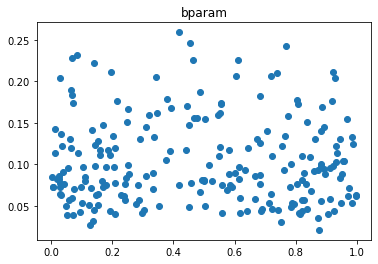

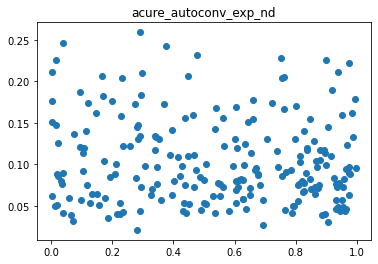

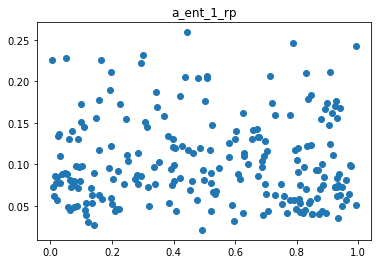

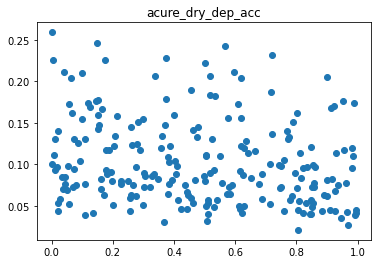

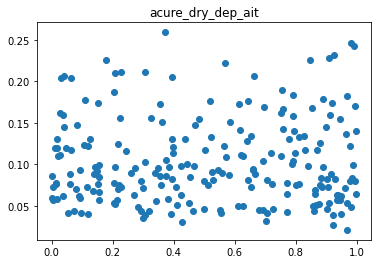

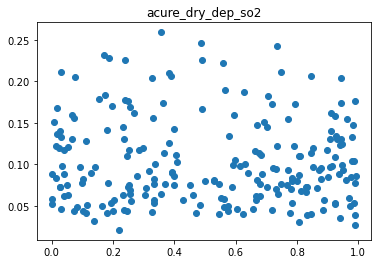

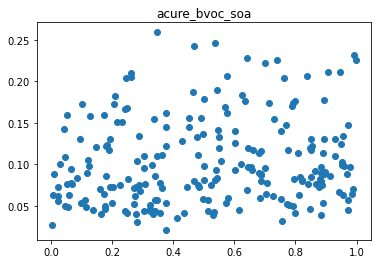

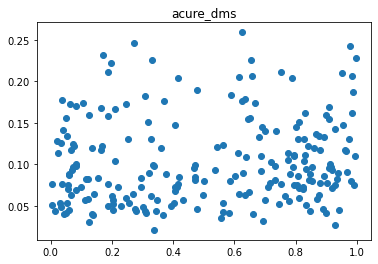

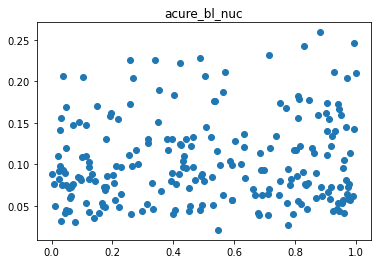

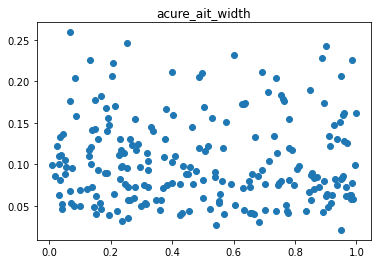

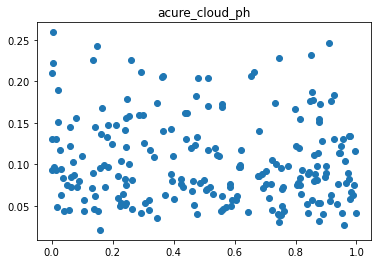

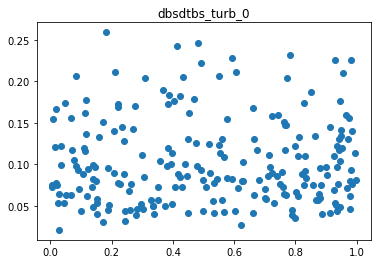

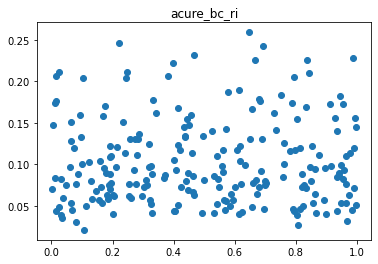

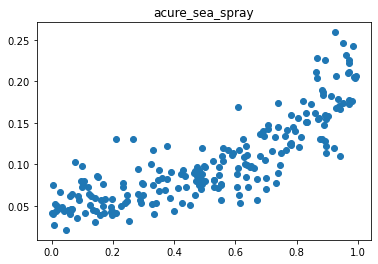

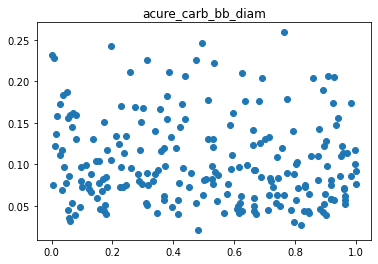

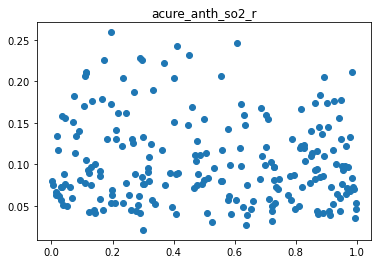

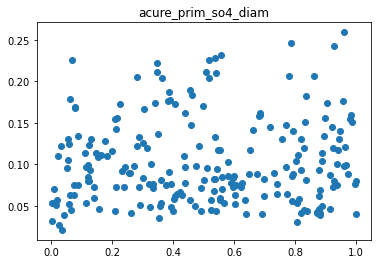

In [19]:
for feature in myFeaturesNames:
    plt.scatter(X_train[feature], y_train)
    plt.title(feature)
    plt.show()

# Fit emulator

See https://tc02d-dev.c3dti.ai/jupyter/notebooks/research_teams/gordon/applying-methods/GPRforAOD.ipynb.

In [18]:
# create kernel
GPR_kernel = c3.SklearnGPRKernelMatern(lengthScale=[1.0]*len(myFeaturesNames), nu=0.5, coefficient=1.0).build().kernel.upsert()

# define technique
GPR_technique = c3.GaussianProcessRegressionTechnique(
    randomState=42,
    kernel=GPR_kernel,
    centerTarget=True
).upsert()

In [19]:
# create pipe
GPR_pipe = c3.GaussianProcessRegressionPipe(
    technique=GPR_technique
)

In [20]:
GPR_trained = GPR_pipe.train(
    input=c3.Dataset.fromPython(X_train),
    targetOutput=c3.Dataset.fromPython(pd.DataFrame(y_train))
)

In [21]:
x = dict(zip(
    myFeaturesNames,
    c3.PythonSerialization.deserialize(serialized=GPR_trained.trainedModel.model).kernel_.get_params()['k2__length_scale']
))

dict(sorted(x.items(), key=lambda item: item[1]))

{'acure_sea_spray': 5.695099308078142,
 'acure_prim_so4_diam': 10.136901875738053,
 'acure_dms': 20.622040506489256,
 'acure_dry_dep_acc': 25.84633102097498,
 'acure_dry_dep_so2': 27.780873035320653,
 'acure_bl_nuc': 37.25713090801569,
 'acure_dry_dep_ait': 41.26598458672639,
 'acure_bvoc_soa': 45.47976885720688,
 'acure_anth_so2_r': 54.91372275293633,
 'a_ent_1_rp': 96.95389948239112,
 'acure_cloud_ph': 114.6228054968061,
 'acure_bc_ri': 162.685938440504,
 'acure_ait_width': 175.807654220555,
 'acure_autoconv_exp_nd': 187.85103695500376,
 'dbsdtbs_turb_0': 780.4641344201323,
 'acure_carb_bb_diam': 5362.9826423468685,
 'bparam': 9469.972249949262}

In [22]:
variance = c3.PythonSerialization.deserialize(serialized=GPR_trained.trainedModel.model).kernel_.get_params()['k1__constant_value']
variance

0.014219845614762394

# Plot response curve

Model output + scatterplot of training data

## Get observed mean

In [1]:
%run ../../Emulator.ipynb
%run ../../Observer.ipynb

In [2]:
a = Emulator(
    region=[-45, 40, -30, 10],
    start_time="2017-07-01T00:00:00",
    end_time="2017-07-02T02:59:59"
)

In [3]:
c = Observer(emulator=a, end_date=(2017, 7, 2))

In [4]:
df1 = c.rgdatasets['MOD182']
df2 = c.rgdatasets['MYD182']

In [7]:
obs_mean = np.mean([
    float(df1[(df1.latitude >= -20) & (df1.latitude <= -19) & (df1.longitude >= -20) & (df1.longitude <= -19)].meanResponse),
    float(df2[(df2.latitude >= -20) & (df2.latitude <= -19) & (df2.longitude >= -20) & (df2.longitude <= -19)].meanResponse)
])

In [6]:
def make_synth_for_poi(k, row=0):

    synth = pd.DataFrame()
    poi = np.linspace(0, 1, 100)
    
    param_point = list(np.array(X_train.iloc[row, :]))
    synth_base = param_point[:k] + param_point[k+1:] # [0.5]*(len(myFeaturesNames)-1)

    for p in poi:
        synth_row = list(synth_base)
        synth_row.insert(k, p)
        synth = pd.concat([synth, pd.DataFrame(synth_row)], axis=1)
    
    return synth.transpose()

## Make figure

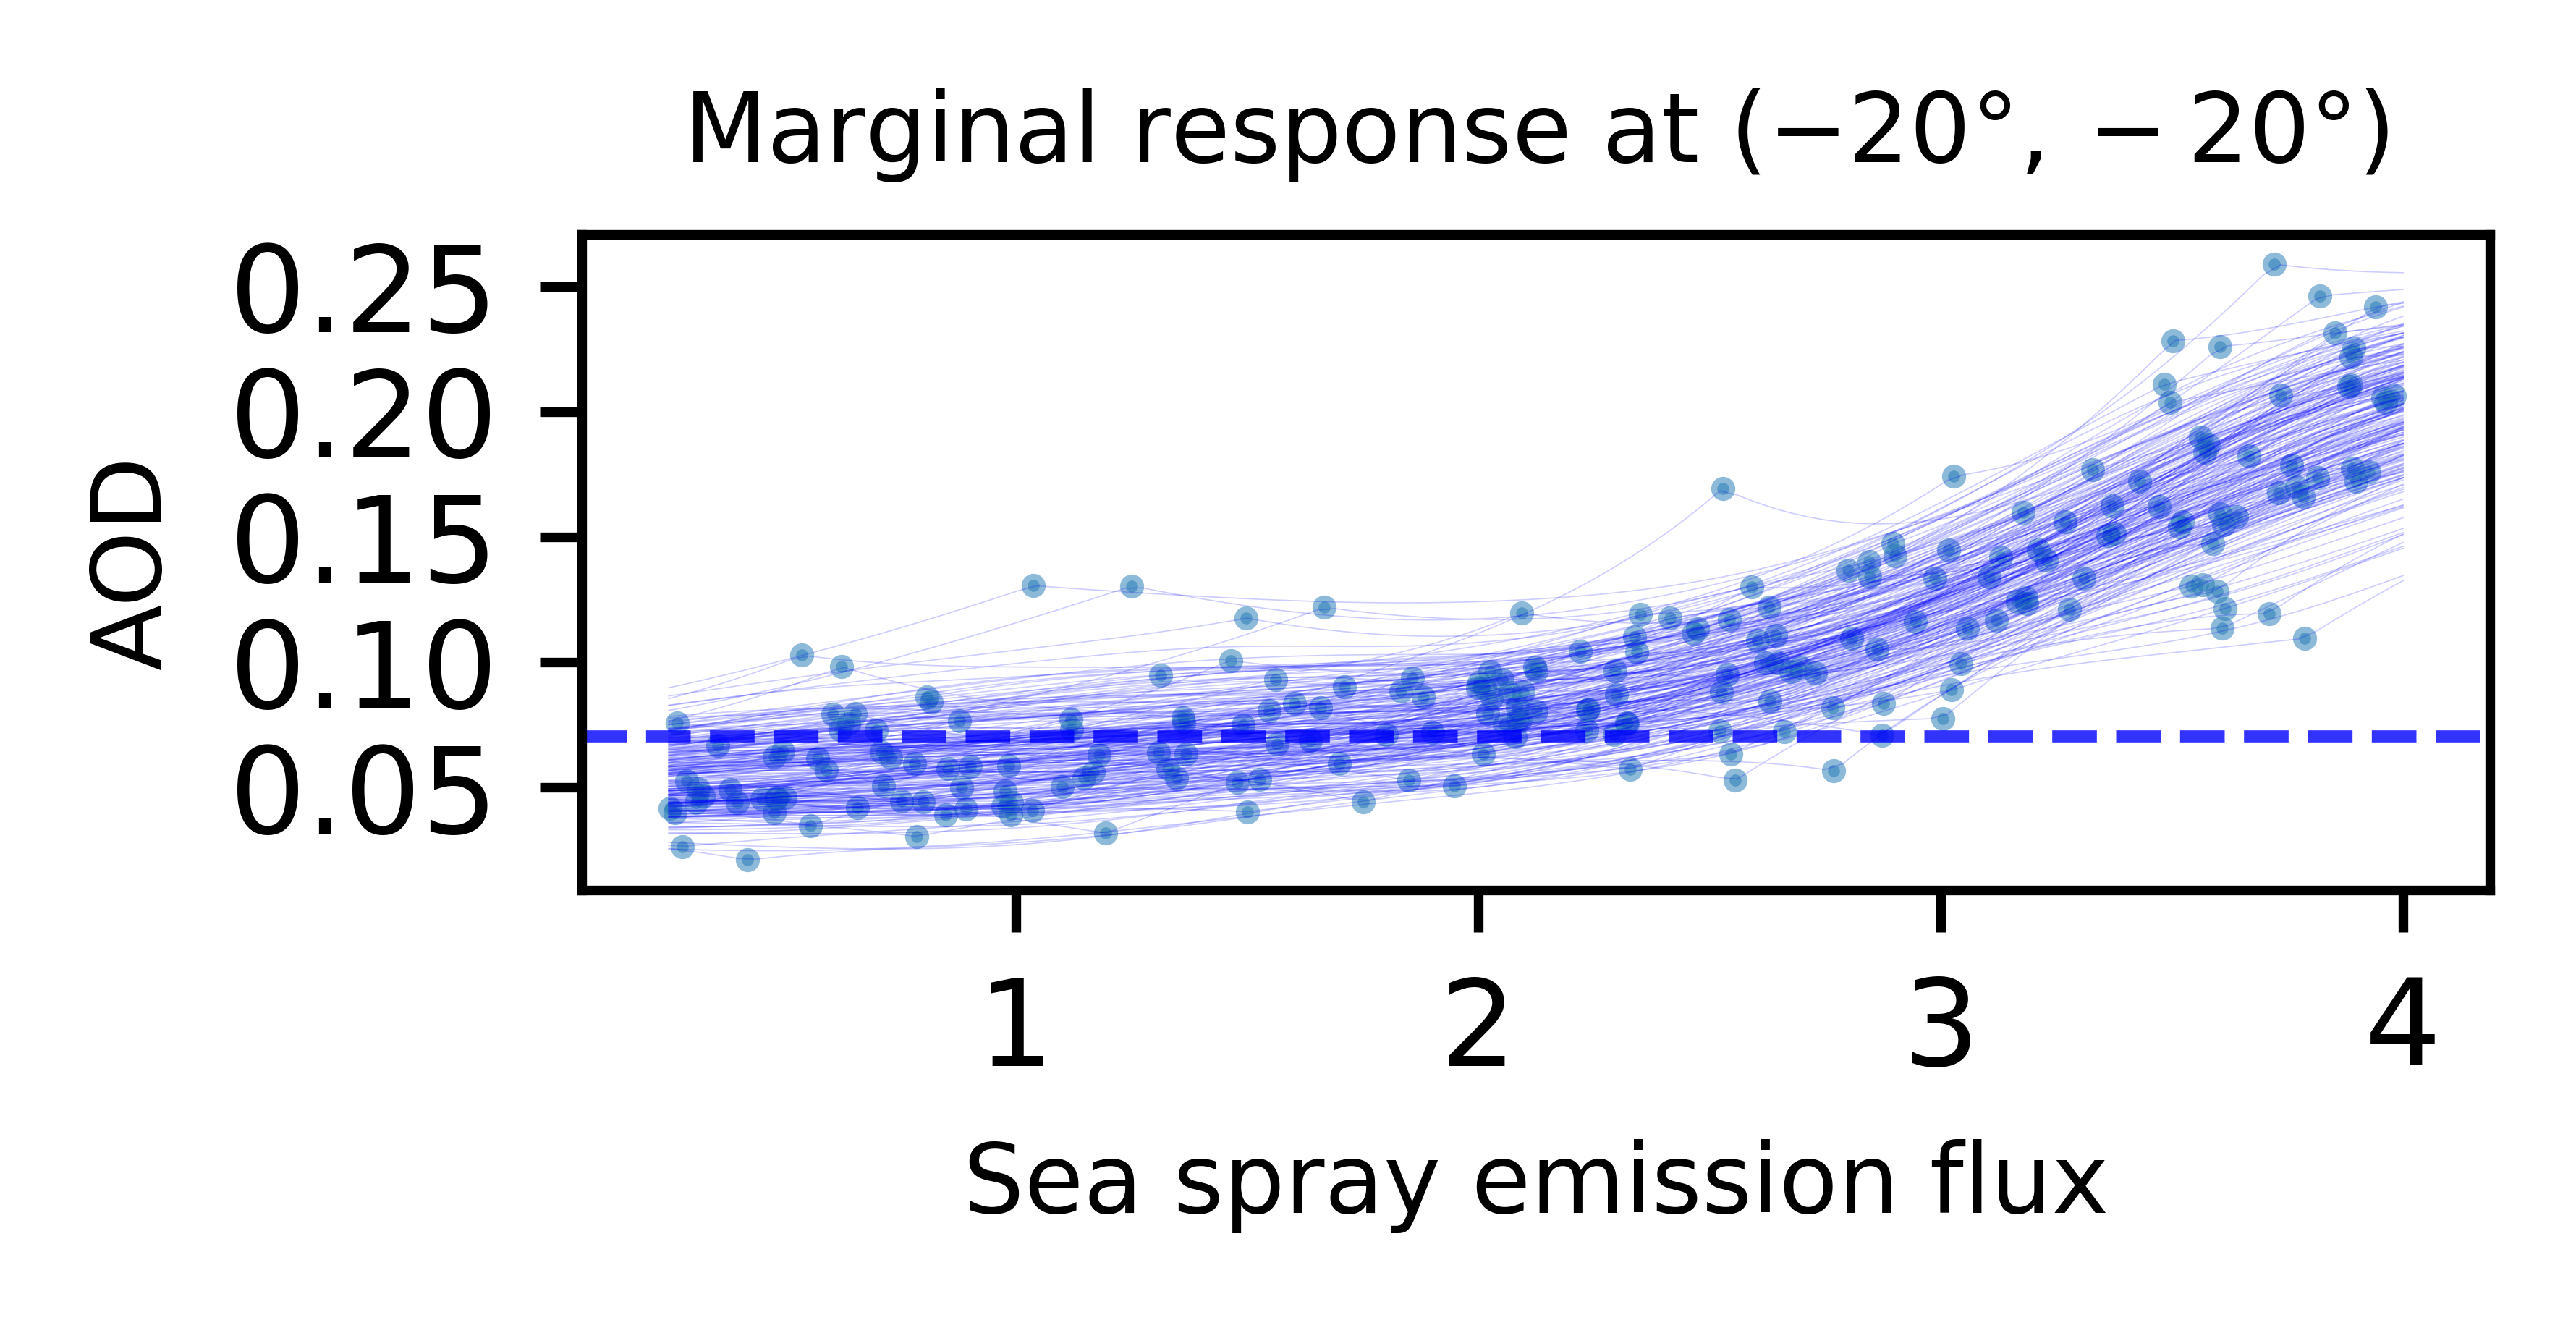

In [44]:
my_param="acure_sea_spray"

fig = plt.figure(figsize=(5.67/2, 1), dpi=1200)
plt.locator_params(axis='y', nbins=6)
plt.scatter(param_df[my_param], y_train, s=1, alpha=0.5)
plt.axhline(obs_mean, c='blue', linestyle='dashed', linewidth=1, alpha=0.8)

for row in range(221):
    y_c = GPR_trained.process(input=c3.Dataset.fromPython(pythonData=make_synth_for_poi(13, row=row)), computeStd=True)
    df_c = c3.Dataset.toPandas(y_c)
    plt.plot(np.linspace(param_ranges[my_param][0], param_ranges[my_param][1], 100), df_c['0'] + GPR_trained.trainedModel.parameters['targetMean'],
             color="blue", linewidth=0.1, alpha=0.2)

plt.title("Marginal response at $(-20\degree, -20\degree)$", fontsize=8)
plt.xlabel("Sea spray emission flux", fontsize=8)
plt.ylabel("AOD", fontsize=8)
plt.show()

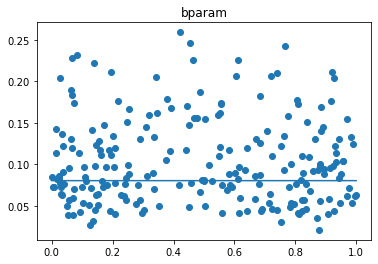

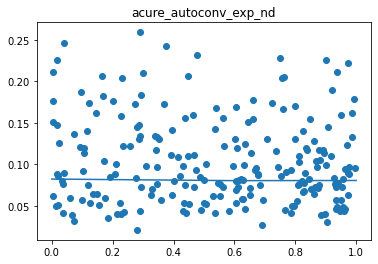

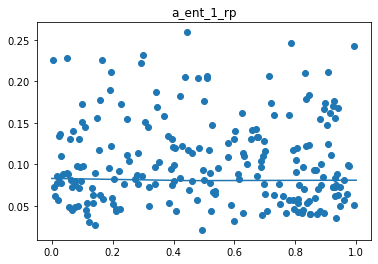

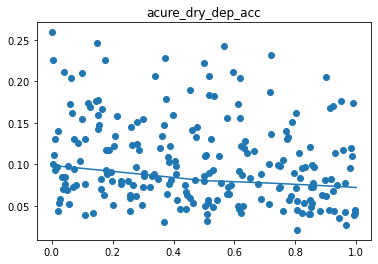

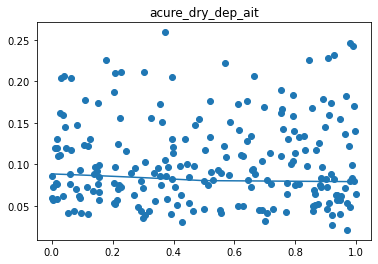

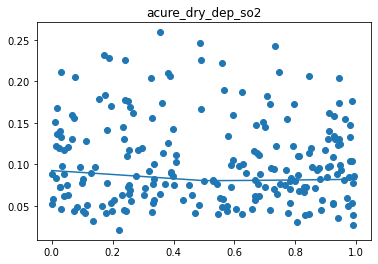

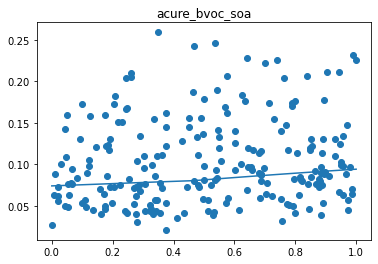

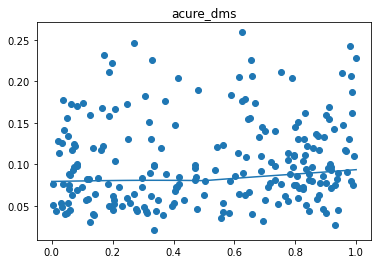

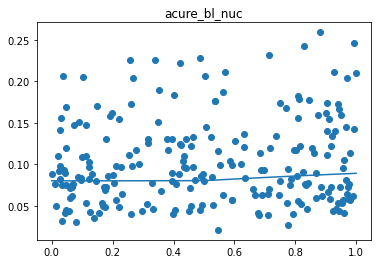

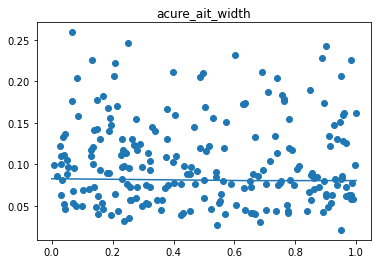

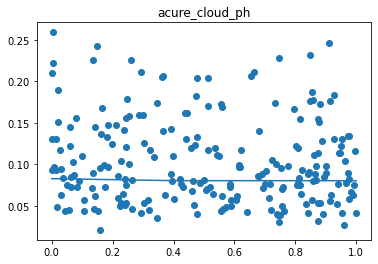

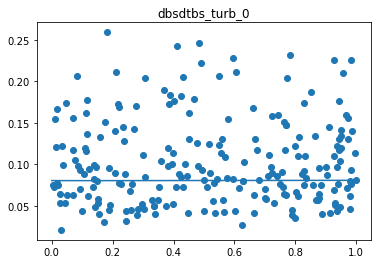

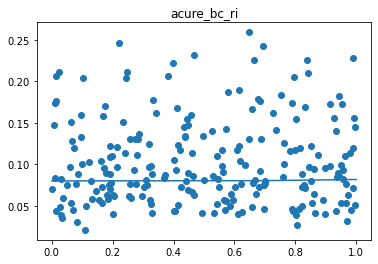

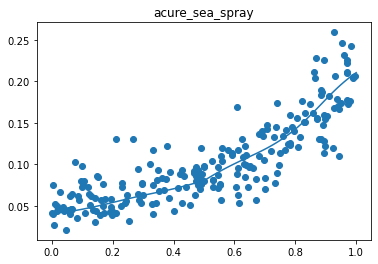

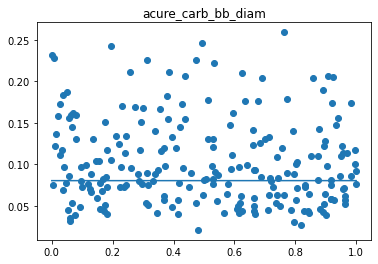

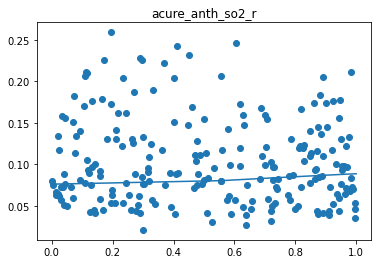

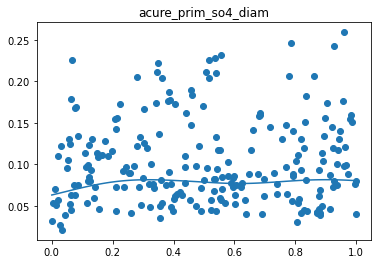

In [33]:
for feature, k in zip(myFeaturesNames, range(len(myFeaturesNames))):
    y_c = GPR_trained.process(input=c3.Dataset.fromPython(pythonData=make_synth_for_poi(k)), computeStd=True)
    df_c = c3.Dataset.toPandas(y_c)
    plt.plot(np.linspace(0, 1, 100), df_c['0'] + GPR_trained.trainedModel.parameters['targetMean'])
    plt.scatter(X_train[feature], y_train)
    plt.title(myFeaturesNames[k])
    plt.show()

# Put it all together

Define `time_points` to be a list of 6-tuples of the form

    (<start_time>, <end_time>, <start_latitude>, <end_latitude>, <start_longitude>, <end_longitude>)

and plug it in to the `make_mean_fit_plot` function to get the mean fit model output curve on top of the training data scatter
plot.

For example,

time_points = [
    ("2017-07-01T00:00:00", "2017-07-01T02:59:59") + (y, y+2, x, x+2) for x in range(-30, 10, 10) for y in range(-40, 40, 10)
]

would define a mesh of points across our domain separated by 10 degrees lat-long.

In [24]:
time_points = [
    ("2017-07-01T00:00:00", "2017-07-01T23:59:59", 0.0, 1.0, 0.0, 1.0)
]

In [27]:
def make_mean_fit_plot(
    time_point
):
    y_train = get_average_response(*time_point)

    GPR_trained = GPR_pipe.train(
        input=c3.Dataset.fromPython(X_train),
        targetOutput=c3.Dataset.fromPython(pd.DataFrame(y_train))
    )

    for feature, k in zip(myFeaturesNames, range(len(myFeaturesNames))):
        y_c = GPR_trained.process(input=c3.Dataset.fromPython(pythonData=make_synth_for_poi(k)), computeStd=True)
        df_c = c3.Dataset.toPandas(y_c)
        plt.plot(np.linspace(0, 1, 100), df_c['0'] + GPR_trained.trainedModel.parameters['targetMean'])
        plt.scatter(X_train[feature], y_train)
        plt.title(myFeaturesNames[k] + ': (' + str(time_point[2]) + ' ,' + str(time_point[4]) + ')')
        # plt.title(myFeaturesNames[k] + '\n' + str(time_point[0:2]) + ' (' + str(time_point[2]) + ',' + str(time_point[4]) + ')')
        plt.savefig("mean-fit-plots/" + myFeaturesNames[k] + "_" + time_point[0] + "_" + time_point[1] + "_" + str(int(time_point[2])) + "_" + str(int(time_point[4])))
        plt.show()

    x = dict(zip(
        myFeaturesNames,
        c3.PythonSerialization.deserialize(serialized=GPR_trained.trainedModel.model).kernel_.get_params()['k2__length_scale']
    ))

    """
    with open("mean-fit-plots/" + time_point[0] + "_" + time_point[1] + "_" + str(int(time_point[2])) + "_" + str(int(time_point[4])), 'a') as the_file:
        for item in dict(sorted(x.items(), key=lambda item: item[1])).items():
            the_file.write(str(item) + '\n')
    """

    return

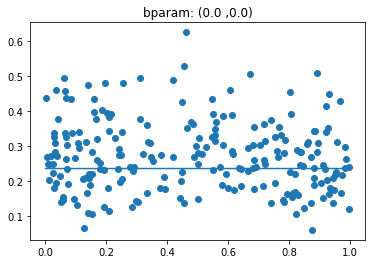

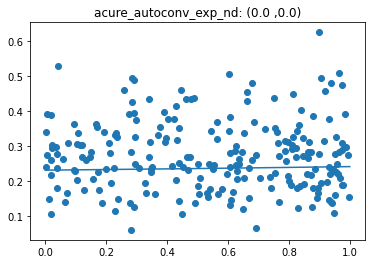

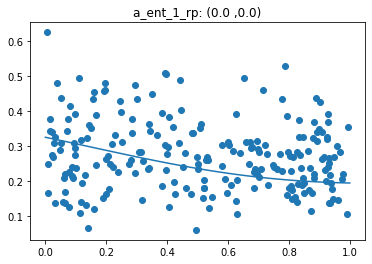

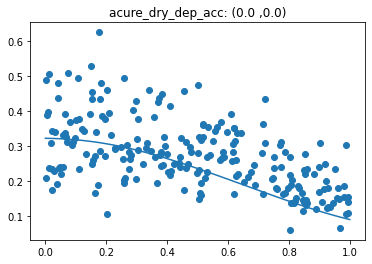

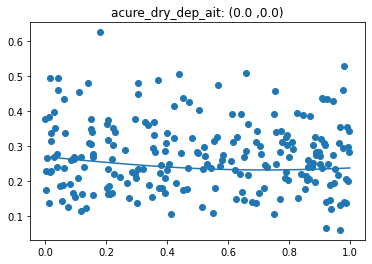

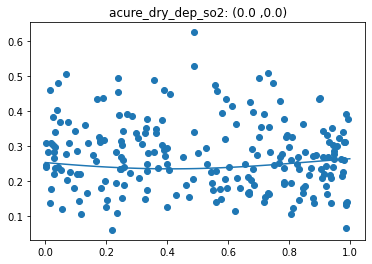

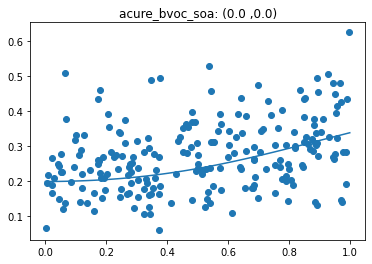

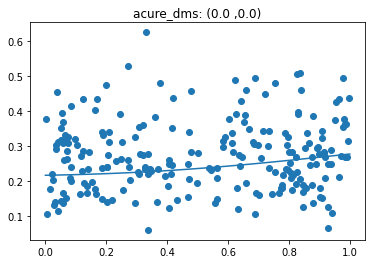

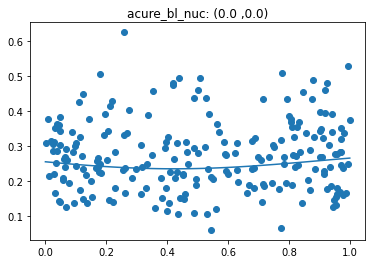

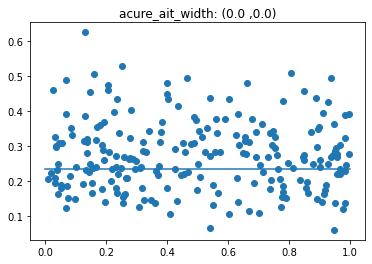

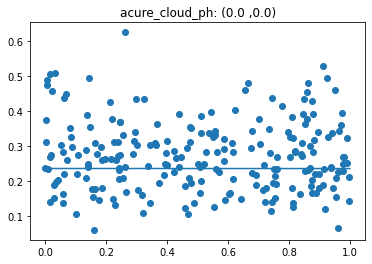

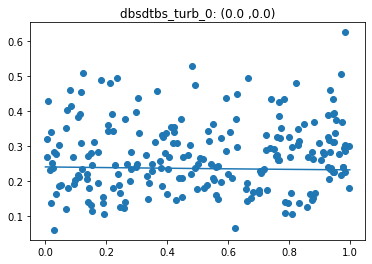

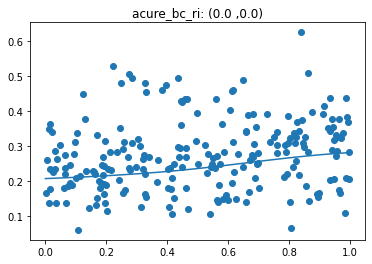

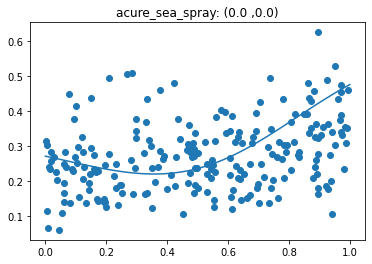

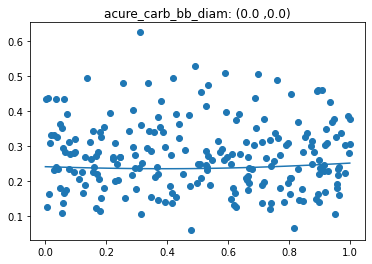

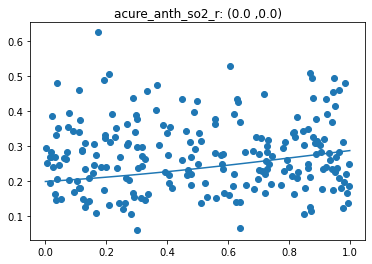

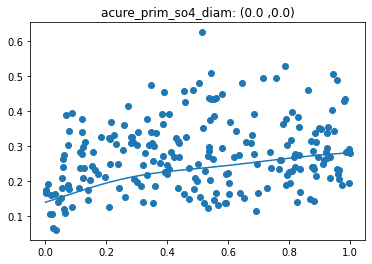

/opt/conda/lib/python3.8/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator GaussianProcessRegressor from version 0.23.1 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


In [26]:
for time_point in time_points:
    make_mean_fit_plot(time_point)